In [1]:
#Importing the required files
import sys
import numpy as np
import json
import matplotlib.pyplot as plt
import urllib.request
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


# Task 1: Choose a suitable web API

API Chosen:

A single web API has been chosen for this assignment from the following website: https://catalog.data.gov/dataset/deaths-from-pneumonia-and-influenza-pi-and-all-deaths-by-state-and-region-national-center-

The API is ready to use and available in various formats like json, rdf, csv.
The json format has been used for this task with the following URL
URL: https://data.cdc.gov/api/views/pp7x-dyj2/rows.json?accessType=DOWNLOAD

There is no key required to access this data

In [2]:
url = "https://data.cdc.gov/api/views/pp7x-dyj2/rows.json?accessType=DOWNLOAD" 

# Task 2: Collecting data from the selected API

Using the URL of the selected API the following commands are executed to load and decode the data from format:

In [3]:



response = urllib.request.urlopen(url)
raw_json = response.read().decode("utf-8")
data_json = json.loads(raw_json)
data_json



{'meta': {'view': {'id': 'pp7x-dyj2',
   'name': 'Deaths from Pneumonia and Influenza (P&I) and all deaths, by state and region, National Center For Health Statistics Mortality Surveillance System',
   'averageRating': 0,
   'category': 'Health Statistics',
   'createdAt': 1473775969,
   'displayType': 'table',
   'downloadCount': 27127,
   'hideFromCatalog': False,
   'hideFromDataJson': False,
   'indexUpdatedAt': 1554476485,
   'newBackend': True,
   'numberOfComments': 0,
   'oid': 23768198,
   'provenance': 'official',
   'publicationAppendEnabled': False,
   'publicationDate': 1476391421,
   'publicationGroup': 13047888,
   'publicationStage': 'published',
   'rowClass': '',
   'rowsUpdatedAt': 1554476414,
   'rowsUpdatedBy': 'g3fc-zmqn',
   'tableId': 13047888,
   'totalTimesRated': 0,
   'viewCount': 21366,
   'viewLastModified': 1532528992,
   'viewType': 'tabular',
   'approvals': [{'reviewedAt': 1476391442,
     'reviewedAutomatically': True,
     'state': 'approved',
     '

# Task 3: Parsing the collected data and storing in appropriate format

### The data retrieved contains meta-data and the required data 

The following code retrives only the data required(not the meta-data) and then loads the data into a data frame, which is then used for the subsequent tasks

In [4]:
data_json.keys()

dict_keys(['meta', 'data'])

In [5]:
data_json['data']

[['row-m6xv~u9n7-7yfm',
  '00000000-0000-0000-0084-A2CB7BFC0B34',
  0,
  1542390160,
  None,
  1542390160,
  None,
  '{ }',
  'State',
  None,
  'New Hampshire',
  'All',
  '2017-18',
  '201805',
  None,
  None,
  '28',
  '286',
  '9.7902097902',
  '143.27764328'],
 ['row-z7zw.n5wv_3ep2',
  '00000000-0000-0000-041C-C81B4DDCA0F3',
  0,
  1542390160,
  None,
  1542390160,
  None,
  '{ }',
  'State',
  None,
  'New York City',
  'All',
  '2015-16',
  '201629',
  None,
  None,
  '64',
  '972',
  '6.5843621399',
  '97.618498443'],
 ['row-4qhv_p2rv~zngr',
  '00000000-0000-0000-A01B-6E2B73C9C6BB',
  0,
  1542390160,
  None,
  1542390160,
  None,
  '{ }',
  'State',
  None,
  'Missouri',
  'All',
  '2009-10',
  '201020',
  None,
  None,
  '84',
  '984',
  '8.5365853659',
  '93.231242095'],
 ['row-erpf_akx2~f5he',
  '00000000-0000-0000-86E4-B1C6E50140AC',
  0,
  1542390160,
  None,
  1542390160,
  None,
  '{ }',
  'Region',
  '3',
  None,
  'All',
  '2010-11',
  '201134',
  '0',
  '280',
  '280

In [6]:
# loading the only the required data into a dataframe
df=pd.DataFrame(data_json['data'])

In [7]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,row-m6xv~u9n7-7yfm,00000000-0000-0000-0084-A2CB7BFC0B34,0,1542390160,None,1542390160,None,{ },State,None,New Hampshire,All,2017-18,201805,None,None,28,286,9.7902097902,143.27764328
1,row-z7zw.n5wv_3ep2,00000000-0000-0000-041C-C81B4DDCA0F3,0,1542390160,None,1542390160,None,{ },State,None,New York City,All,2015-16,201629,None,None,64,972,6.5843621399,97.618498443
2,row-4qhv_p2rv~zngr,00000000-0000-0000-A01B-6E2B73C9C6BB,0,1542390160,None,1542390160,None,{ },State,None,Missouri,All,2009-10,201020,None,None,84,984,8.5365853659,93.231242095
3,row-erpf_akx2~f5he,00000000-0000-0000-86E4-B1C6E50140AC,0,1542390160,None,1542390160,None,{ },Region,3,None,All,2010-11,201134,0,280,280,4662,6.006006006,92.565116153
4,row-u4mk~4x7q_jawz,00000000-0000-0000-4653-9A5B9C4FBADA,0,1542390160,None,1542390160,None,{ },State,None,Kansas,All,2017-18,201820,None,None,19,496,3.8306451613,105.19458116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32601,row-r6pz.ar8k~sps3,00000000-0000-0000-66C8-3B87B94C4318,0,1553875228,None,1553875228,None,{ },State,None,Vermont,All,2018-19,201909,None,None,10,115,8.6956521739,114.62158424
32602,row-jmdc_kpuq-shae,00000000-0000-0000-BD87-7DD287E1991F,0,1553875228,None,1553875228,None,{ },State,None,Pennsylvania,All,2017-18,201806,None,None,232,2896,8.0110497238,120.19866826
32603,row-gi9w.34m9_zdy3,00000000-0000-0000-BC8D-A79AFBA3FB36,0,1553875228,None,1553875228,None,{ },Region,7,None,All,2017-18,201822,1,141,142,2421,5.8653448988,102.90227325
32604,row-mghu-qwnh-m25g,00000000-0000-0000-EA7E-068E00D07744,0,1553875228,None,1553875228,None,{ },State,None,Georgia,All,2017-18,201814,None,None,94,1640,5.7317073171,121.01440833


# Task 4:  Load and represent the data into appropriate data structure and the applyoing necessary preprocessing steps to clean/filter/combine the data


### The data is already stored in a dataframe which is an appropriate structure for the subsequent steps so there is no need to convert it into another form

# Preprocessing and Cleaning the Data

### Preprocessing and cleaning Step 1:

In [8]:
# dropping the columns which play no role in Data Analysis 

df=df.drop([0,1,2,3,4,5,6,7],axis=1)

In [9]:
df

,8,9,10,11,12,13,14,15,16,17,18,19
0,State,None,New Hampshire,All,2017-18,201805,None,None,28,286,9.7902097902,143.27764328
1,State,None,New York City,All,2015-16,201629,None,None,64,972,6.5843621399,97.618498443
2,State,None,Missouri,All,2009-10,201020,None,None,84,984,8.5365853659,93.231242095
3,Region,3,None,All,2010-11,201134,0,280,280,4662,6.006006006,92.565116153
4,State,None,Kansas,All,2017-18,201820,None,None,19,496,3.8306451613,105.19458116
...,...,...,...,...,...,...,...,...,...,...,...,...
32601,State,None,Vermont,All,2018-19,201909,None,None,10,115,8.6956521739,114.62158424
32602,State,None,Pennsylvania,All,2017-18,201806,None,None,232,2896,8.0110497238,120.19866826
32603,Region,7,None,All,2017-18,201822,1,141,142,2421,5.8653448988,102.90227325
32604,State,None,Georgia,All,2017-18,201814,None,None,94,1640,5.7317073171,121.01440833


### Preprocessing and cleaning Step 2:

In [10]:
# Renaming the columns with appropriate colomn names for better representation and Understanding

df.columns=['Geoid','Region','State','Age','Season','MMWR Year/Week','Deaths From influenza','Deaths From pneumonia','Deaths From pneumonia And influenza','All Deaths','Percent of deaths due to pneumonia Or influenza','Percent complete']



In [11]:
df.head()

,Geoid,Region,State,Age,Season,MMWR Year/Week,Deaths From influenza,Deaths From pneumonia,Deaths From pneumonia And influenza,All Deaths,Percent of deaths due to pneumonia Or influenza,Percent complete
0,State,None,New Hampshire,All,2017-18,201805,None,None,28,286,9.7902097902,143.27764328
1,State,None,New York City,All,2015-16,201629,None,None,64,972,6.5843621399,97.618498443
2,State,None,Missouri,All,2009-10,201020,None,None,84,984,8.5365853659,93.231242095
3,Region,3,None,All,2010-11,201134,0,280,280,4662,6.006006006,92.565116153
4,State,None,Kansas,All,2017-18,201820,None,None,19,496,3.8306451613,105.19458116


### Preprocessing and cleaning Step 3:

In [12]:
# checking for the number of Null value in each column
df.isnull().sum()

Geoid                                                  1
Region                                             27665
State                                               6918
Age                                                    0
Season                                                 0
MMWR Year/Week                                         0
Deaths From influenza                              25689
Deaths From pneumonia                              25689
Deaths From pneumonia And influenza                   24
All Deaths                                            24
Percent of deaths due to pneumonia Or influenza       24
Percent complete                                       0
dtype: int64

In [13]:
#replacing the NaN  or Null values with 0 in all columns wherever they appear

df=df.fillna(value=0)

In [14]:
df


,Geoid,Region,State,Age,Season,MMWR Year/Week,Deaths From influenza,Deaths From pneumonia,Deaths From pneumonia And influenza,All Deaths,Percent of deaths due to pneumonia Or influenza,Percent complete
0,State,0,New Hampshire,All,2017-18,201805,0,0,28,286,9.7902097902,143.27764328
1,State,0,New York City,All,2015-16,201629,0,0,64,972,6.5843621399,97.618498443
2,State,0,Missouri,All,2009-10,201020,0,0,84,984,8.5365853659,93.231242095
3,Region,3,0,All,2010-11,201134,0,280,280,4662,6.006006006,92.565116153
4,State,0,Kansas,All,2017-18,201820,0,0,19,496,3.8306451613,105.19458116
...,...,...,...,...,...,...,...,...,...,...,...,...
32601,State,0,Vermont,All,2018-19,201909,0,0,10,115,8.6956521739,114.62158424
32602,State,0,Pennsylvania,All,2017-18,201806,0,0,232,2896,8.0110497238,120.19866826
32603,Region,7,0,All,2017-18,201822,1,141,142,2421,5.8653448988,102.90227325
32604,State,0,Georgia,All,2017-18,201814,0,0,94,1640,5.7317073171,121.01440833


In [15]:
print(type(df['Percent of deaths due to pneumonia Or influenza']))
print(type(df))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


### Preprocessing Step 4

In [16]:
# converting Percent of deaths due to pneumonia Or influenza and Percent complete into float type

df['Percent of deaths due to pneumonia Or influenza']= df['Percent of deaths due to pneumonia Or influenza'].astype(float)
df['Percent complete']= df['Percent complete'].astype(float)
print(type(df['Percent complete']))

<class 'pandas.core.series.Series'>


In [17]:
type(df['Percent complete'])

pandas.core.series.Series

In [18]:
# rounding of the column which were converted into float type to 2 decimal places

df['Percent of deaths due to pneumonia Or influenza_rounded']= df['Percent of deaths due to pneumonia Or influenza'].round(2)
df['Percent complete_round']= df['Percent complete'].round(2)

In [19]:
df

,Geoid,Region,State,Age,Season,MMWR Year/Week,Deaths From influenza,Deaths From pneumonia,Deaths From pneumonia And influenza,All Deaths,Percent of deaths due to pneumonia Or influenza,Percent complete,Percent of deaths due to pneumonia Or influenza_rounded,Percent complete_round
0,State,0,New Hampshire,All,2017-18,201805,0,0,28,286,9.790210,143.277643,9.79,143.28
1,State,0,New York City,All,2015-16,201629,0,0,64,972,6.584362,97.618498,6.58,97.62
2,State,0,Missouri,All,2009-10,201020,0,0,84,984,8.536585,93.231242,8.54,93.23
3,Region,3,0,All,2010-11,201134,0,280,280,4662,6.006006,92.565116,6.01,92.57
4,State,0,Kansas,All,2017-18,201820,0,0,19,496,3.830645,105.194581,3.83,105.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32601,State,0,Vermont,All,2018-19,201909,0,0,10,115,8.695652,114.621584,8.70,114.62
32602,State,0,Pennsylvania,All,2017-18,201806,0,0,232,2896,8.011050,120.198668,8.01,120.20
32603,Region,7,0,All,2017-18,201822,1,141,142,2421,5.865345,102.902273,5.87,102.90
32604,State,0,Georgia,All,2017-18,201814,0,0,94,1640,5.731707,121.014408,5.73,121.01


### Preprocessing step 5

In [20]:
# Dropping Columns Season , Percent of deaths due to pneumonia Or influenza, Percent complete 

df=df.drop(columns=['Season', 'Percent of deaths due to pneumonia Or influenza','Percent complete'])

### Preprocessing Step 6

In [21]:
# Converting the column 'MMWR Year/Week' into 'MMWR Year/Week'(column only having the year and not the week)

type(df['MMWR Year/Week'])
df['MMWR Year/Week']= df['MMWR Year/Week'].astype(int)
df['Year'] = df['MMWR Year/Week'] // 100
df = df.drop(columns=['MMWR Year/Week'])

In [22]:
df

,Geoid,Region,State,Age,Deaths From influenza,Deaths From pneumonia,Deaths From pneumonia And influenza,All Deaths,Percent of deaths due to pneumonia Or influenza_rounded,Percent complete_round,Year
0,State,0,New Hampshire,All,0,0,28,286,9.79,143.28,2018
1,State,0,New York City,All,0,0,64,972,6.58,97.62,2016
2,State,0,Missouri,All,0,0,84,984,8.54,93.23,2010
3,Region,3,0,All,0,280,280,4662,6.01,92.57,2011
4,State,0,Kansas,All,0,0,19,496,3.83,105.19,2018
...,...,...,...,...,...,...,...,...,...,...,...
32601,State,0,Vermont,All,0,0,10,115,8.70,114.62,2019
32602,State,0,Pennsylvania,All,0,0,232,2896,8.01,120.20,2018
32603,Region,7,0,All,1,141,142,2421,5.87,102.90,2018
32604,State,0,Georgia,All,0,0,94,1640,5.73,121.01,2018


### Preprocessing Step 7

In [23]:
# Converting the Categorical column age into numeric column using Lable Encoder and One Hot Encoder 

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
X= df.iloc[:,3:4].values
print(X.shape)
le= LabelEncoder()
X= le.fit_transform(X)
OHE= OneHotEncoder(categorical_features=[0])
X=OHE.fit_transform(X.reshape(-1,1)).toarray()

        

(32606, 1)


/Users/Arunuday/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Arunuday/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/Arunuday/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: 

In [24]:
type(X[505,0])


numpy.float64

In [25]:
# Adding Columns of different age group brackets into the dataframe

df['0-17']=X[:,0]
df['18-64']=X[:,1]
df['64 & above']=X[:,2]
df['All']=X[:,3]

In [26]:
 # converting the column into Integer
    
df['0-17']= df['0-17'].astype(int)
df['18-64']= df['18-64'].astype(int)
df['64 & above']= df['64 & above'].astype(int)
df['All']= df['All'].astype(int)

# Dropping the column age as it is no longer required
df = df.drop(columns=['Age'])

In [27]:
df

,Geoid,Region,State,Deaths From influenza,Deaths From pneumonia,Deaths From pneumonia And influenza,All Deaths,Percent of deaths due to pneumonia Or influenza_rounded,Percent complete_round,Year,0-17,18-64,64 & above,All
0,State,0,New Hampshire,0,0,28,286,9.79,143.28,2018,0,0,0,1
1,State,0,New York City,0,0,64,972,6.58,97.62,2016,0,0,0,1
2,State,0,Missouri,0,0,84,984,8.54,93.23,2010,0,0,0,1
3,Region,3,0,0,280,280,4662,6.01,92.57,2011,0,0,0,1
4,State,0,Kansas,0,0,19,496,3.83,105.19,2018,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32601,State,0,Vermont,0,0,10,115,8.70,114.62,2019,0,0,0,1
32602,State,0,Pennsylvania,0,0,232,2896,8.01,120.20,2018,0,0,0,1
32603,Region,7,0,1,141,142,2421,5.87,102.90,2018,0,0,0,1
32604,State,0,Georgia,0,0,94,1640,5.73,121.01,2018,0,0,0,1


# Task  5: Analysing the Preprocessed and cleaned Dataset:

In [28]:
'''This method is defined to calulate the total death count of people suffering from pneumonia and influeza'''

def age(age_dataframe,death_dataframe):
    sum,count=0,0
    j =0
    for i in age_dataframe:
            count = int(death_dataframe[j])
            if i == 1: 
                sum=sum+count
            j+=1
    death_count.append(sum)

[9732, 322684, 1483489, 5448075]


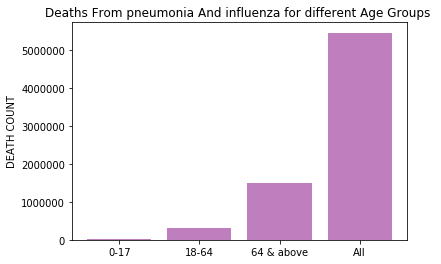

In [29]:
'''The below bar chart shows total count of Deaths From pneumonia And influenza for age groups'0-17','18-64','64 & above','All' 
It is found to be minimum for (0-17 agegroup{9511}),and High from '64 & above','All' as shown in the below graph'''


import matplotlib.pyplot as plt
death_count = []
age(df['0-17'],df['Deaths From pneumonia And influenza'])
age(df['18-64'],df['Deaths From pneumonia And influenza'])
age(df['64 & above'],df['Deaths From pneumonia And influenza'])
age(df['All'],df['Deaths From pneumonia And influenza'])

print(death_count)
age_group = ['0-17','18-64','64 & above','All']
y = np.arange(len(age_group))
plt.bar(y, death_count, align='center', alpha=0.5,color = 'purple')
plt.xticks(y, age_group,rotation='horizontal')
plt.ylabel('DEATH COUNT')
plt.title('Deaths From pneumonia And influenza for different Age Groups ')
plt.show()

[8308, 308415, 1446068, 3525963]


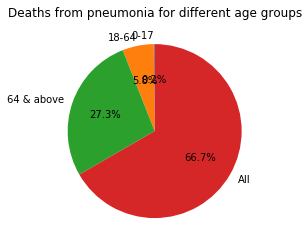

In [30]:
'''The below pie  chart shows total count of Deaths From pneumonia for age groups'0-17','18-64','64 & above','All' 
It is found to be minimum for (0-17 agegroup2 %}),and High from '64 & above','All' as shown in the below graph'''

death_count = []
age(df['0-17'],df['Deaths From pneumonia'])
age(df['18-64'],df['Deaths From pneumonia'])
age(df['64 & above'],df['Deaths From pneumonia'])
age(df['All'],df['Deaths From pneumonia'])
print(death_count)

plt.pie(death_count, labels=age_group, startangle=90, autopct='%.01f%%')
plt.title('Deaths from pneumonia for different age groups')
plt.show()

[1424, 14269, 37421, 106228]


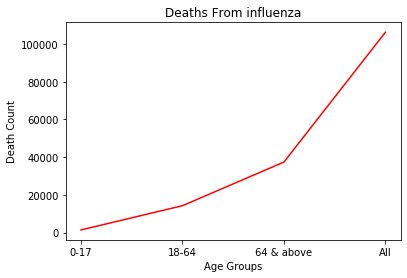

In [31]:
'''The below line plot shows total count of Deaths From influenza for age groups'0-17','18-64','64 & above','All' 
It is found to be minimum for (0-17 agegroup{1372}),and High from '64 & above','All' as shown in the below graph'''
death_count = []
age(df['0-17'],df['Deaths From influenza'])
age(df['18-64'],df['Deaths From influenza'])
age(df['64 & above'],df['Deaths From influenza'])
age(df['All'],df['Deaths From influenza'])

print(death_count)

plt.plot(age_group,death_count, color='r')
plt.xlabel('Age Groups')
plt.ylabel('Death Count')
plt.title('Deaths From influenza')
plt.show()

In [32]:
'''Method which calculates the death count for specific years(2010-2018)'''
def death_yearwise(year,deaths,k):
    sum,count=0,0
    for i in year:
        j = 0
        if i == k:
            count = int(deaths[j])
            sum=sum+count
        j+=1
    death_year_list.append(sum)

Text(0.5, 1.0, 'Total Deaths from 2010 to 2018 ')

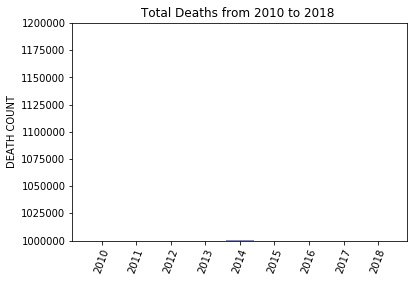

In [33]:
death_year_list =[]
death_yearwise(df['Year'],df['All Deaths'],2010)
death_yearwise(df['Year'],df['All Deaths'],2011)
death_yearwise(df['Year'],df['All Deaths'],2012)
death_yearwise(df['Year'],df['All Deaths'],2013)
death_yearwise(df['Year'],df['All Deaths'],2014)
death_yearwise(df['Year'],df['All Deaths'],2015)
death_yearwise(df['Year'],df['All Deaths'],2016)
death_yearwise(df['Year'],df['All Deaths'],2017)
death_yearwise(df['Year'],df['All Deaths'],2018)

year_group = ['2010','2011','2012','2013','2014','2015','2016','2017','2018']
y = np.arange(len(year_group))
plt.bar(y,death_year_list,align='center', alpha=0.5,color = 'blue')
plt.ylim([1000000,1200000])
plt.xticks(y,year_group,rotation='70')
plt.ylabel('DEATH COUNT')
plt.title('Total Deaths from 2010 to 2018 ')


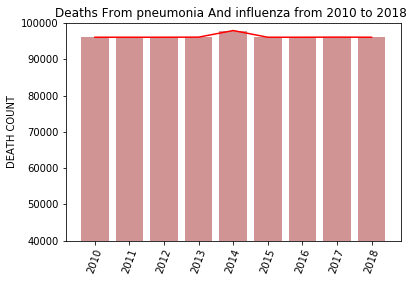

In [34]:
death_year_list =[]
death_yearwise(df['Year'],df['Deaths From pneumonia And influenza'],2010)
death_yearwise(df['Year'],df['Deaths From pneumonia And influenza'],2011)
death_yearwise(df['Year'],df['Deaths From pneumonia And influenza'],2012)
death_yearwise(df['Year'],df['Deaths From pneumonia And influenza'],2013)
death_yearwise(df['Year'],df['Deaths From pneumonia And influenza'],2014)
death_yearwise(df['Year'],df['Deaths From pneumonia And influenza'],2015)
death_yearwise(df['Year'],df['Deaths From pneumonia And influenza'],2016)
death_yearwise(df['Year'],df['Deaths From pneumonia And influenza'],2017)
death_yearwise(df['Year'],df['Deaths From pneumonia And influenza'],2018)

year_group = ['2010','2011','2012','2013','2014','2015','2016','2017','2018']
y = np.arange(len(year_group))
plt.bar(y,death_year_list,align='center', alpha=0.5,color = 'brown')
plt.ylim([40000,100000])
plt.xticks(y,year_group,rotation='70')
plt.ylabel('DEATH COUNT')
plt.title('Deaths From pneumonia And influenza from 2010 to 2018 ')
plt.plot(year_group,death_year_list, color='r')

In [35]:
# Method which counts the death count for different Geoid's {State, National, Region}

def geoid_count(death_dataframe, count_list):
    j=0
    for i in df['Geoid']:
        if i =="State":
            count_list[0]=count_list[0]+int(death_dataframe[j])
        if i =="National":
            count_list[1]=count_list[1]+int(death_dataframe[j])
        if i =="Region":
            count_list[2]=count_list[2]+int(death_dataframe[j])
        j=j+1        
    return count_list       
        
         
        
        

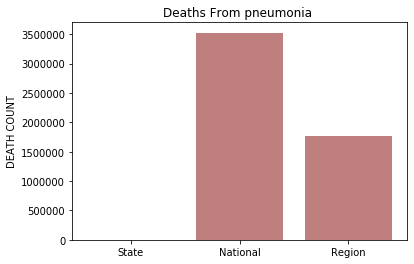

In [36]:
'''The below bar shows total count of Deaths From Pneumonia for Geoid groups'State','National','Region' 
It is found that there are no deaths in State Geoid group (0) ,and Maximum deaths are in 'National' (3455820) as shown in the below graph'''

import matplotlib.pyplot as plt
count_list_pneumonia=[0,0,0]

count_list_pneumonia=geoid_count(df['Deaths From pneumonia'],count_list_pneumonia)
geoid_group = ['State','National','Region']
y = np.arange(len(geoid_group))
plt.bar(y, count_list_pneumonia, align='center', alpha=0.5,color = 'maroon')
plt.xticks(y, geoid_group,rotation='horizontal')
plt.ylabel('DEATH COUNT')
plt.title('Deaths From pneumonia ')
plt.show()




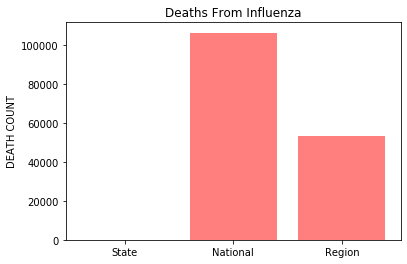

In [37]:
'''The below bar shows total count of Deaths From Influenza for Geoid groups'State','National','Region' 
It is found that there are no deaths in State Geoid group (0) ,and Maximum deaths are in 'National' (99537) as shown in the below graph'''

import matplotlib.pyplot as plt
count_list_influenza=[0,0,0]
count_list_influenza=geoid_count(df['Deaths From influenza'],count_list_influenza)


geoid_group = ['State','National','Region']
y = np.arange(len(geoid_group))
plt.bar(y, count_list_influenza, align='center', alpha=0.5,color = 'red')
plt.xticks(y, geoid_group,rotation='horizontal')
plt.ylabel('DEATH COUNT')
plt.title('Deaths From Influenza')
plt.show()


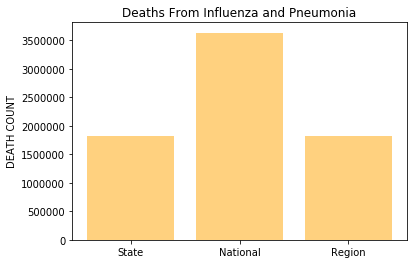

In [38]:
'''The below bar shows total count of Deaths From Influenza and Pneumonia for Geoid groups 'State','National','Region' 
It is found that Maximum deaths are in 'National' (3555357) as shown in the below graph'''


import matplotlib.pyplot as plt
count_list_influenza_pneumonia=[0,0,0]
count_list_influenza_pneumonia=geoid_count(df['Deaths From pneumonia And influenza'],count_list_influenza_pneumonia)

geoid_group = ['State','National','Region']
y = np.arange(len(geoid_group))
plt.bar(y, count_list_influenza_pneumonia, align='center', alpha=0.5,color = 'orange')
plt.xticks(y, geoid_group,rotation='horizontal')
plt.ylabel('DEATH COUNT')
plt.title('Deaths From Influenza and Pneumonia')
plt.show()

In [39]:
df['Region'].unique()

array([0, '3', '5', '2', '4', '8', '7', '9', '10', '6', '1'], dtype=object)

In [40]:
# Method which counts the death count for different Geographic Regions across USa 

count_region=[]

def region_count(death_dataframe, count_list):
    j=0
    for i in df['Region']:
        if i =="0":
            count_list[0]=count_list[0]+int(death_dataframe[j])
        if i =="1":
            count_list[1]=count_list[1]+int(death_dataframe[j])
        if i =="2":
            count_list[2]=count_list[2]+int(death_dataframe[j])
        if i =="3":
            count_list[3]=count_list[3]+int(death_dataframe[j])
        if i =="4":
            count_list[4]=count_list[4]+int(death_dataframe[j])
        if i =="5":
            count_list[5]=count_list[5]+int(death_dataframe[j])
        if i =="6":
            count_list[6]=count_list[6]+int(death_dataframe[j])
        if i =="7":
            count_list[7]=count_list[7]+int(death_dataframe[j])
        if i =="8":
            count_list[8]=count_list[8]+int(death_dataframe[j])
        if i =="9":
            count_list[9]=count_list[9]+int(death_dataframe[j])
        if i =="10":
            count_list[10]=count_list[10]+int(death_dataframe[j])    
        j=j+1        
    return count_list       
        
         
        


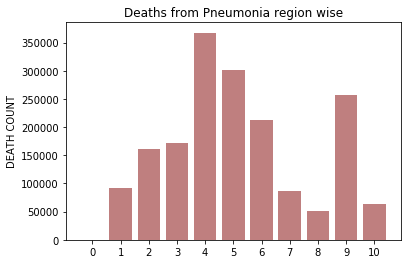

In [41]:
'''The below bar shows total count of Deaths From Pneumonia Region wise
It is found that Maximum deaths are in Region 4 and minimum in region 8'''


import matplotlib.pyplot as plt
count_list_pneumonia_region=[0,0,0,0,0,0,0,0,0,0,0]

count_list_pneumonia_region=region_count(df['Deaths From pneumonia'],count_list_pneumonia_region)
region_group = ['0','1','2','3','4','5','6','7','8','9','10']
y = np.arange(len(region_group))
plt.bar(y, count_list_pneumonia_region, align='center', alpha=0.5,color = 'maroon')
plt.xticks(y, region_group,rotation='horizontal')
plt.ylabel('DEATH COUNT')
plt.title('Deaths from Pneumonia region wise')
plt.show()


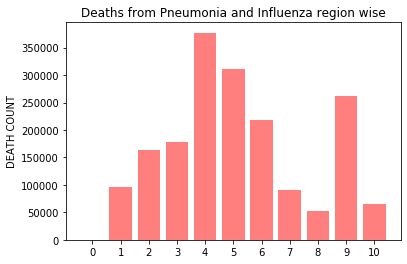

In [42]:
'''The below bar shows total count of Deaths From Pneumonia and Influenza Region wise
It is found that Maximum deaths are in Region 4 and minimum in region 8'''


import matplotlib.pyplot as plt
count_list_influenza_pneumonia_region=[0,0,0,0,0,0,0,0,0,0,0]

count_list_influenza_pneumonia_region=region_count(df['Deaths From pneumonia And influenza'],count_list_influenza_pneumonia_region)
region_group = ['0','1','2','3','4','5','6','7','8','9','10']
y = np.arange(len(region_group))
plt.bar(y, count_list_influenza_pneumonia_region, align='center', alpha=0.5,color = 'red')
plt.xticks(y, region_group,rotation='horizontal')
plt.ylabel('DEATH COUNT')
plt.title('Deaths from Pneumonia and Influenza region wise')
plt.show()

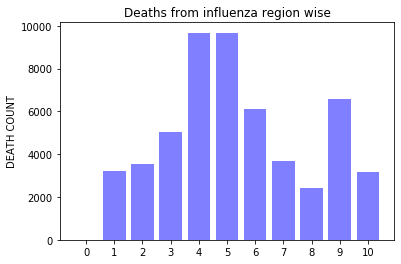

In [43]:
'''The below bar shows total count of Deaths From Influenza Region wise
It is found that Maximum deaths are in Region 5 and minimum in region 8'''


import matplotlib.pyplot as plt
count_list_influenza_region=[0,0,0,0,0,0,0,0,0,0,0]

count_list_influenza_region=region_count(df['Deaths From influenza'],count_list_influenza_region)
region_group = ['0','1','2','3','4','5','6','7','8','9','10']
y = np.arange(len(region_group))
plt.bar(y, count_list_influenza_region, align='center', alpha=0.5,color = 'blue')
plt.xticks(y, region_group,rotation='horizontal')
plt.ylabel('DEATH COUNT')
plt.title('Deaths from influenza region wise')
plt.show()